In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
train_data = pd.read_csv('train.csv')

In [7]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
location    1420 non-null object
date        1420 non-null object
b3001       1420 non-null int64
b3002       1420 non-null int64
b3003       1420 non-null int64
b3004       1420 non-null int64
b3005       1420 non-null int64
b3006       1420 non-null int64
b3007       1420 non-null int64
b3008       1420 non-null int64
b3009       1420 non-null int64
b3010       1420 non-null int64
b3011       1420 non-null int64
b3012       1420 non-null int64
b3013       1420 non-null int64
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


(array([14., 17., 13., 22.,  6., 16.,  9.,  5.,  1.,  2.]),
 array([ 2. ,  5.2,  8.4, 11.6, 14.8, 18. , 21.2, 24.4, 27.6, 30.8, 34. ]),
 <a list of 10 Patch objects>)

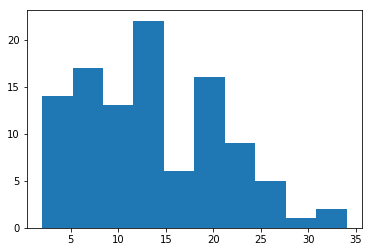

In [13]:
plt.hist(train_data['location'].value_counts())

In [19]:
pd.DataFrame(train_data['location'].value_counts()).head(10)

,location
K04,34
J04,32
J06,29
I06,27
I07,27
J07,27
I08,26
K05,25
O04,24
O05,24


### 将每一个iBeacon的取值可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A329727BA8>,
      dtype=object)

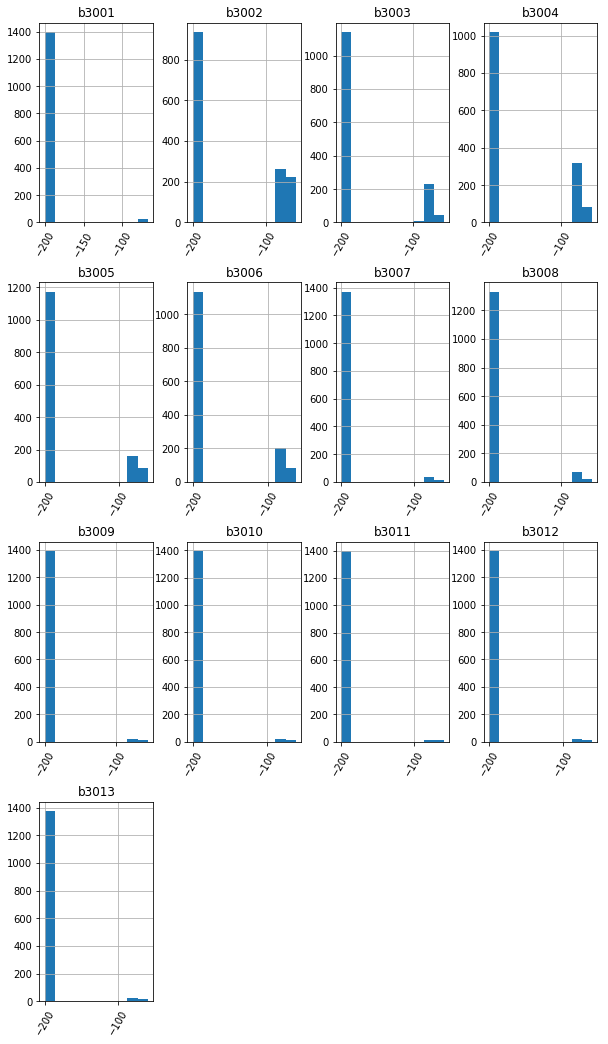

In [117]:
train_data.hist(figsize=(10,18),xrot=60,xlabelsize=10)

In [27]:
def classify(pos):
    x = pos[0]
    y = pos[1:]
    print(x,y)
    if(x >= 'A' and x <= 'H'):
        return 1
    elif(y >= '1' and y <= '9'):
        return 2
    else:
        return 3
#将平面图分为三个区域

In [28]:
train_data['loc']=train_data['location']
train_data['loc'] = train_data['loc'].apply(classify)

O 02
P 01
P 01
P 01
P 01
P 01
P 01
P 02
R 01
R 01
R 01
R 01
R 01
R 02
R 02
R 02
R 02
R 02
R 02
R 02
R 02
R 02
S 01
S 01
S 01
S 01
S 01
S 01
S 01
S 01
S 01
S 01
S 02
S 02
S 02
S 02
S 02
S 02
S 02
T 01
T 01
U 02
U 01
U 01
U 01
U 01
U 02
J 03
J 03
J 03
J 03
J 03
K 03
K 03
K 03
K 03
K 03
K 03
K 03
K 03
L 03
L 03
L 03
L 03
L 03
L 03
M 03
M 03
M 03
M 03
M 03
M 03
N 03
N 03
N 03
N 03
N 03
N 03
O 03
O 03
O 03
P 03
P 03
P 03
P 03
P 03
P 03
Q 03
Q 03
Q 03
Q 03
Q 03
Q 03
Q 03
Q 03
Q 03
R 03
R 03
R 03
R 03
R 03
R 03
S 03
T 03
T 03
T 03
U 03
U 03
U 03
U 03
U 03
U 03
U 03
U 04
U 04
U 04
T 04
T 04
T 04
T 04
T 04
T 04
S 04
S 04
S 04
S 04
S 04
S 04
R 04
R 04
R 04
R 04
R 04
Q 04
Q 04
Q 04
Q 04
Q 04
Q 04
Q 04
Q 04
P 04
P 04
P 04
P 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
O 04
N 04
N 04
N 04
N 04
N 04
M 04
M 04
M 04
M 04
M 04
M 04
M 04
M 04
M 04
L 04
L 04
L 04
L 04
L 04
L 04
L 04
L 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
K 04
J 04
J 04
J 04
J 04
J 04
J 04
J 04
J 04
I 04


In [34]:
x = train_data.iloc[:, 2:] 
y = train_data['loc']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,shuffle=False) #因为要和时间对应上，所以不允许弄乱顺序

In [35]:
from sklearn.svm import SVC
classif = SVC()
classif.fit(train_x,train_y)
classif.predict(train_x)

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [38]:
test_y

1136    3
1137    3
1138    3
1139    3
1140    3
1141    3
1142    3
1143    3
1144    3
1145    3
1146    3
1147    3
1148    3
1149    3
1150    3
1151    3
1152    3
1153    3
1154    3
1155    3
1156    3
1157    3
1158    3
1159    3
1160    3
1161    3
1162    3
1163    3
1164    3
1165    3
       ..
1390    3
1391    3
1392    3
1393    3
1394    3
1395    3
1396    3
1397    3
1398    3
1399    3
1400    3
1401    3
1402    3
1403    3
1404    3
1405    3
1406    3
1407    3
1408    3
1409    3
1410    3
1411    3
1412    3
1413    3
1414    3
1415    3
1416    3
1417    3
1418    3
1419    3
Name: loc, Length: 284, dtype: int64

In [36]:
classif.score(test_x,test_y)

1.0

### 否决将平面图分为三个区域的方案

In [22]:
x = train_data.iloc[:, 2:] 
y = train_data.iloc[:, 0]
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,shuffle=False) #因为要和时间对应上，所以不允许弄乱顺序

In [26]:
from sklearn.svm import SVC
classif = SVC()
classif.fit(train_x,train_y)
classif.predict(train_x)

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['N05', 'N05', 'N05', ..., 'N04', 'N04', 'O04'], dtype=object)

In [25]:
classif.score(test_x,test_y)

0.18661971830985916

### 否决直接进行训练的方案

### 将坐标转化为x轴和y轴

In [41]:
def fix_pos(x_cord):
    x = 87 - ord(x_cord.upper())
    return x

In [42]:
train_data['location']
train_data['x'] = train_data['location'].str[0]
train_data['y'] = train_data['location'].str[1:]
train_data.drop(['location'],axis=1,inplace=True)
train_data['x'] = train_data['x'].apply(fix_pos)
train_data['y'] = train_data['y'].astype(int)

In [43]:
x = train_data.iloc[:, 1:-2] #x是给定数据
y = train_data.iloc[:, -2:] #y是估计值
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,shuffle=False) #因为要和时间对应上，所以不允许弄乱顺序

### 计算点到入口的曼哈顿距离并分类

In [44]:
def calculate_dist(x,y):
    x1,y1 = x,y
    x2,y2 = 19, 9
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dists = abs(x1 - x2) + abs(y1 - y2)
    return dists

In [45]:
train_y['dis'] = np.ones(len(train_y))
for i in range(len(train_y)):
    temp = calculate_dist(train_y['x'][i],train_y['y'][i])
    train_y['dis'][i] = temp

C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lilacfei\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [46]:
test_y['dis'] = np.ones(len(test_y))
for i in range(1136,1420):
    temp = calculate_dist(test_y['x'][i],test_y['y'][i])
    test_y['dis'][i] = temp

C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
pd.DataFrame(train_y['dis'].value_counts()).head(10)

,dis
12.0,107
11.0,95
13.0,89
14.0,81
8.0,68
18.0,66
9.0,66
16.0,61
15.0,60
10.0,59


In [61]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(train_x)
train_x = standardScaler.transform(train_x)
std_test_x = standardScaler.transform(test_x)

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [62]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(train_x,train_y['dis'])
svm_clf.score(std_test_x,test_y['dis'])
y_pred=svm_clf.predict(std_test_x)
print(classification_report(test_y['dis'], y_pred))

              precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
        11.0       0.09      0.38      0.15         8
        12.0       0.12      0.29      0.17        14
        13.0       0.07      0.11      0.09        18
        14.0       0.05      0.08      0.06        13
        15.0       0.00      0.00      0.00        10
        16.0       0.31      0.38      0.34        29
        17.0       0.00      0.00      0.00        30
        18.0       0.36      0.33      0.35        27
        19.0       0.08      0.45      0.14        20
        20.0       0.00      0.00      0.00        26
        21.0       0.00      0.00      0.00        31
        22.0       0.00      0.00      0.00        26
        23.0       0.00      0.00      0.00        18
        24.0       0.00      0.00      0.00        10
        25.0       0.00      0.00      0.00         4

   micro avg       0.14      0.14      0.14       284
   macro avg       0.07   

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


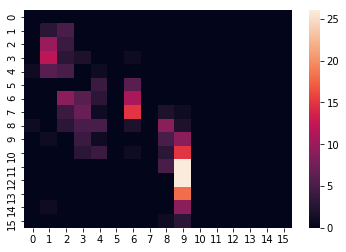

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(test_y['dis'], y_pred))

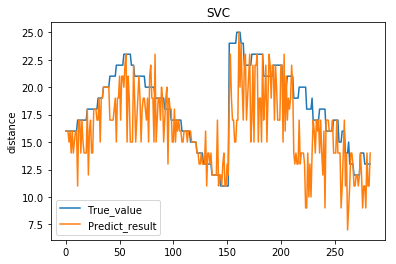

<Figure size 432x288 with 0 Axes>

In [175]:
true_ar = np.array(test_y['dis'])
pred_ar = y_pred
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(true_ar, label='True_value')
ax.plot(pred_ar, label='Predict_result')
ax.set_ylabel(r'distance')
ax.set_title('SVC')
ax.legend(loc='best')
plt.show()
plt.savefig('SVC.png')

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(train_x,train_y['dis'])
dt_clf.score(std_test_x,test_y['dis'])
y_pred=dt_clf.predict(std_test_x)
print(classification_report(test_y['dis'], y_pred))

              precision    recall  f1-score   support

         7.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.19      0.38      0.25         8
        12.0       0.64      0.64      0.64        14
        13.0       0.24      0.22      0.23        18
        14.0       0.13      0.38      0.20        13
        15.0       0.10      0.30      0.15        10
        16.0       0.59      0.55      0.57        29
        17.0       0.21      0.30      0.25        30
        18.0       0.62      0.30      0.40        27
        19.0       0.23      0.35      0.27        20
        20.0       0.50      0.23      0.32        26
        21.0       0.12      0.03      0.05        31
        22.0       0.40      0.23      0.29        26
        23.0       0.33      0.17      0.22        18
        24.0       1.00      0.10      0.18        10
        25.0       1.00    

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


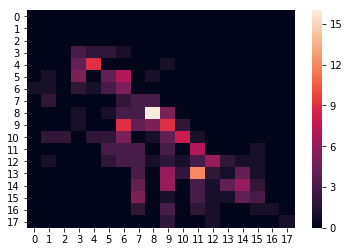

In [68]:
sns.heatmap(confusion_matrix(test_y['dis'], y_pred))

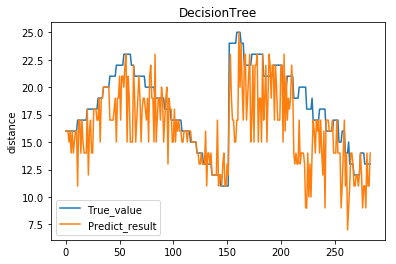

<Figure size 432x288 with 0 Axes>

In [176]:
true_ar = np.array(test_y['dis'])
pred_ar = y_pred
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(true_ar, label='True_value')
ax.plot(pred_ar, label='Predict_result')
ax.set_ylabel(r'distance')
ax.set_title('DecisionTree')
ax.legend(loc='best')
plt.show()
plt.savefig('DecisionTree.png')

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=DecisionTreeClassifier()
rf_clf.fit(train_x,train_y['dis'])
rf_clf.score(std_test_x,test_y['dis'])
y_pred=rf_clf.predict(std_test_x)
print(classification_report(test_y['dis'], y_pred))

              precision    recall  f1-score   support

         7.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.19      0.38      0.25         8
        12.0       0.69      0.64      0.67        14
        13.0       0.24      0.22      0.23        18
        14.0       0.13      0.38      0.20        13
        15.0       0.12      0.40      0.19        10
        16.0       0.58      0.52      0.55        29
        17.0       0.21      0.30      0.25        30
        18.0       0.58      0.26      0.36        27
        19.0       0.20      0.30      0.24        20
        20.0       0.46      0.23      0.31        26
        21.0       0.12      0.03      0.05        31
        22.0       0.40      0.23      0.29        26
        23.0       0.33      0.17      0.22        18
        24.0       1.00      0.10      0.18        10
        25.0       1.00    

C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Lilacfei\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


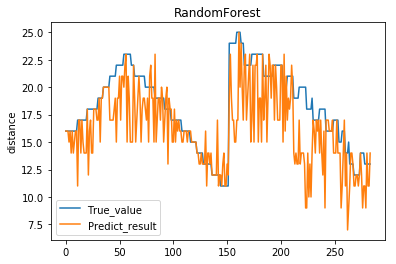

<Figure size 432x288 with 0 Axes>

In [177]:
true_ar = np.array(test_y['dis'])
pred_ar = y_pred
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(true_ar, label='True_value')
ax.plot(pred_ar, label='Predict_result')
ax.set_ylabel(r'distance')
ax.set_title('RandomForest')
ax.legend(loc='best')
plt.show()
plt.savefig('RandomForest.png')

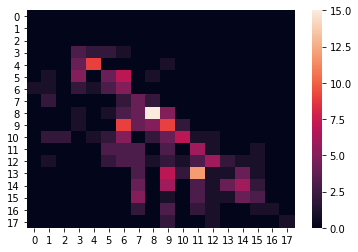

In [74]:
sns.heatmap(confusion_matrix(test_y['dis'], y_pred))